In [1]:
import vectorbt as vbt
import numpy as np
from itertools import combinations, product
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:

symbol = "ETHUSDT"
interval = '1m'

In [3]:
df = pd.read_csv('../../adata/' + symbol + '_' + interval + '.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,close,open,high,low,volume
timestamp,,,,,
2023-01-11 20:28:00+00:00,1342.11,1342.67,1342.67,1342.04,89.1358
2023-01-11 20:29:00+00:00,1342.79,1342.11,1342.80,1342.10,287.3937
2023-01-11 20:30:00+00:00,1342.62,1342.80,1342.80,1342.61,244.8034
2023-01-11 20:31:00+00:00,1342.71,1342.62,1342.72,1342.61,92.7954
2023-01-11 20:32:00+00:00,1342.23,1342.71,1342.72,1342.18,127.9790
...,...,...,...,...,...
2025-01-11 20:23:00+00:00,3284.00,3282.22,3285.39,3282.22,212.5300
2025-01-11 20:24:00+00:00,3282.37,3283.99,3283.99,3282.37,32.7617
2025-01-11 20:25:00+00:00,3282.61,3282.37,3283.00,3281.36,44.0346


In [4]:
# Shift the 'Close' column to get the price 24 periods back
df['close24h'] = df['close'].shift(1440)
df['close1w'] = df['close'].shift(10080)

# Calculate the percentage change
df['close24h_pct'] = ((df['close'] - df['close24h']) / df['close24h']) * 100
df['close1w_pct'] = ((df['close'] - df['close1w']) / df['close1w']) * 100
df.dropna(inplace=True)
df.describe()


,close,open,high,low,volume,close24h,close1w,close24h_pct,close1w_pct
count,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06
mean,2.461104e+03,2.461103e+03,2.462107e+03,2.460077e+03,2.688672e+02,2.458777e+03,2.442431e+03,1.432220e-01,1.099226e+00
std,7.330385e+02,7.330386e+02,7.335360e+02,7.325288e+02,5.021602e+02,7.331791e+02,7.322643e+02,2.922495e+00,7.826811e+00
min,1.372790e+03,1.372790e+03,1.377430e+03,1.368390e+03,0.000000e+00,1.372790e+03,1.339630e+03,-2.617908e+01,-3.569361e+01
25%,1.826920e+03,1.826920e+03,1.827400e+03,1.826460e+03,6.869190e+01,1.826000e+03,1.818060e+03,-1.260268e+00,-3.577176e+00
50%,2.306630e+03,2.306630e+03,2.307385e+03,2.305960e+03,1.395709e+02,2.304800e+03,2.293325e+03,5.363583e-02,3.458618e-01
75%,3.131503e+03,3.131500e+03,3.133000e+03,3.129990e+03,2.848065e+02,3.127600e+03,3.107530e+03,1.491037e+00,5.569678e+00
max,4.104270e+03,4.104270e+03,4.107800e+03,4.097140e+03,2.696644e+04,4.104270e+03,4.104270e+03,2.429477e+01,4.122574e+01


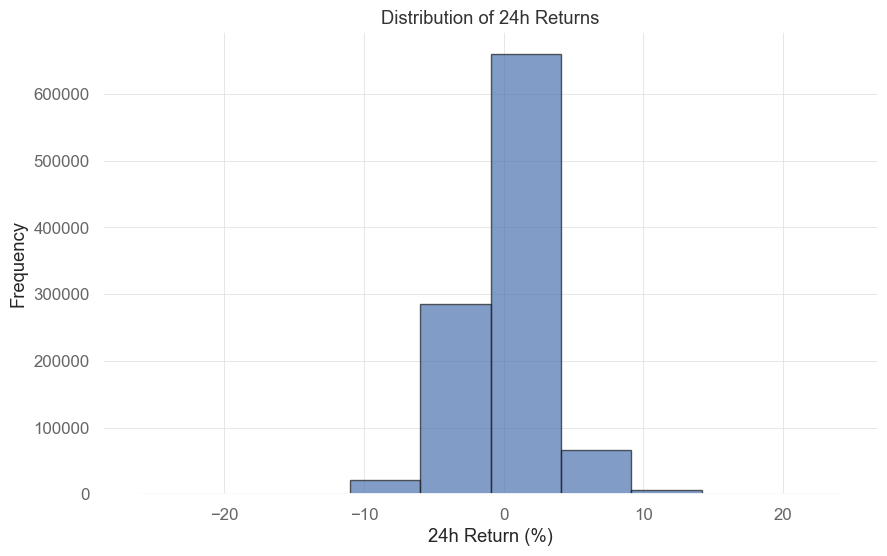

In [5]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['close24h_pct'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of 24h Returns')
plt.xlabel('24h Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

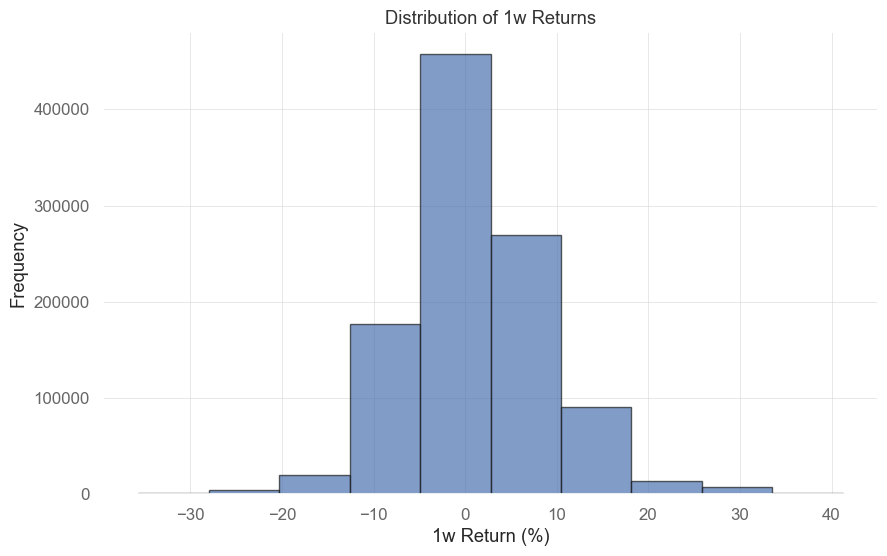

In [6]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['close1w_pct'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of 1w Returns')
plt.xlabel('1w Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

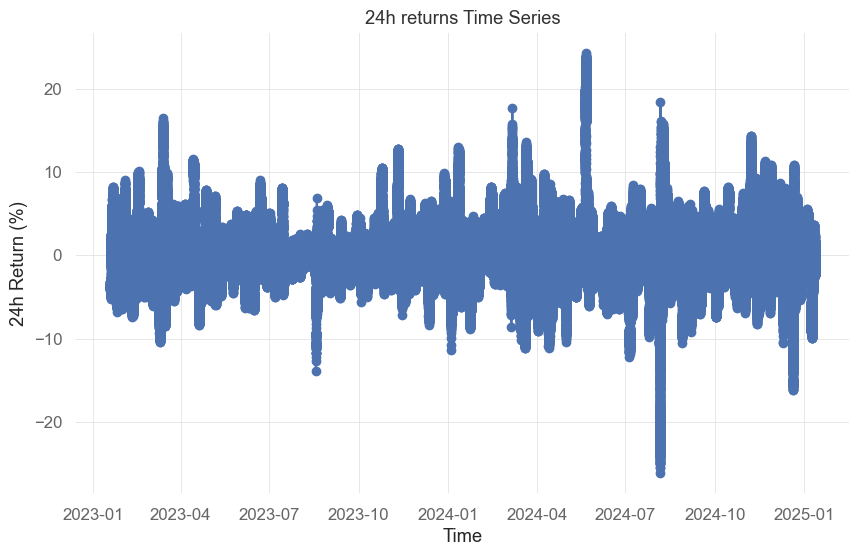

In [7]:
# Plot the log return as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['close24h_pct'], marker='o', linestyle='-', color='b')
plt.title('24h returns Time Series')
plt.xlabel('Time')
plt.ylabel('24h Return (%)')
plt.grid(True)
plt.show()

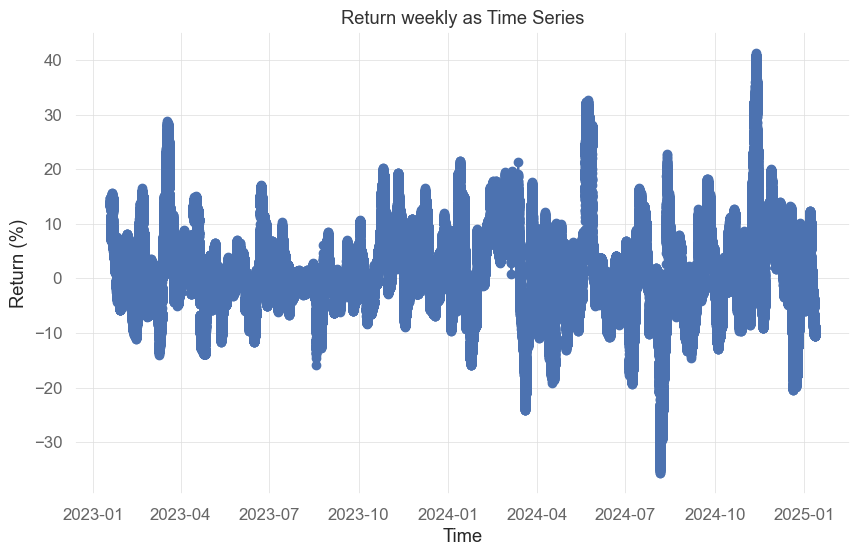

In [8]:
# Plot the log return as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['close1w_pct'], marker='o', linestyle='-', color='b')
plt.title('Return weekly as Time Series')
plt.xlabel('Time')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()